In [42]:
import numpy as np
import time
import random
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import SGDAdam, RMSprop
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD


### 1. Loading and Preprocessing the MNIST Dataset


In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0


x_train = x_train.reshape(-1, 28 * 28)
x_test  = x_test.reshape(-1, 28 * 28)


y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)


### 2. Splitting the Training Set into Training and Validation Sets


In [9]:


x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

### 3. Designing the MLP Architecture with Keras


In [10]:
def create_model():
    model = Sequential()
    # First hidden layer: 128 neurons, ReLU activation, input dimension is 784
    model.add(Dense(128, activation='relu', input_shape=(784,)))
    # Second hidden layer: 64 neurons, ReLU activation
    model.add(Dense(64, activation='relu'))
    # Output layer: 10 neurons (for 10 classes), softmax activation
    model.add(Dense(10, activation='softmax'))
    return model

model = create_model()
optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


### 4. Training the Model with Different Batch Strategies

Epoch 1/50
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 127s 3ms/step - accuracy: 0.8786 - loss: 0.3930 - val_accuracy: 0.9421 - val_loss: 0.1938
Epoch 2/50
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 125s 3ms/step - accuracy: 0.9618 - loss: 0.1204 - val_accuracy: 0.9657 - val_loss: 0.1144
Epoch 3/50
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 125s 3ms/step - accuracy: 0.9727 - loss: 0.0863 - val_accuracy: 0.9657 - val_loss: 0.1130
Epoch 4/50
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 141s 3ms/step - accuracy: 0.9796 - loss: 0.0629 - val_accuracy: 0.9717 - val_loss: 0.1071
Epoch 5/50
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 147s 3ms/step - accuracy: 0.9827 - loss: 0.0545 - val_accuracy: 0.9732 - val_loss: 0.1017
Epoch 6/50
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 123s 3ms/step - accuracy: 0.9847 - loss: 0.0476 - val_accuracy: 0.9728 - val_loss: 0.1071
Epoch 7/50
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 124s 3ms/step - accuracy: 0.9878 - loss: 0.0359 - val_accuracy: 0.9752 - val_loss: 0.1016
Epoch 8/50
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 123s 3ms/step - ac

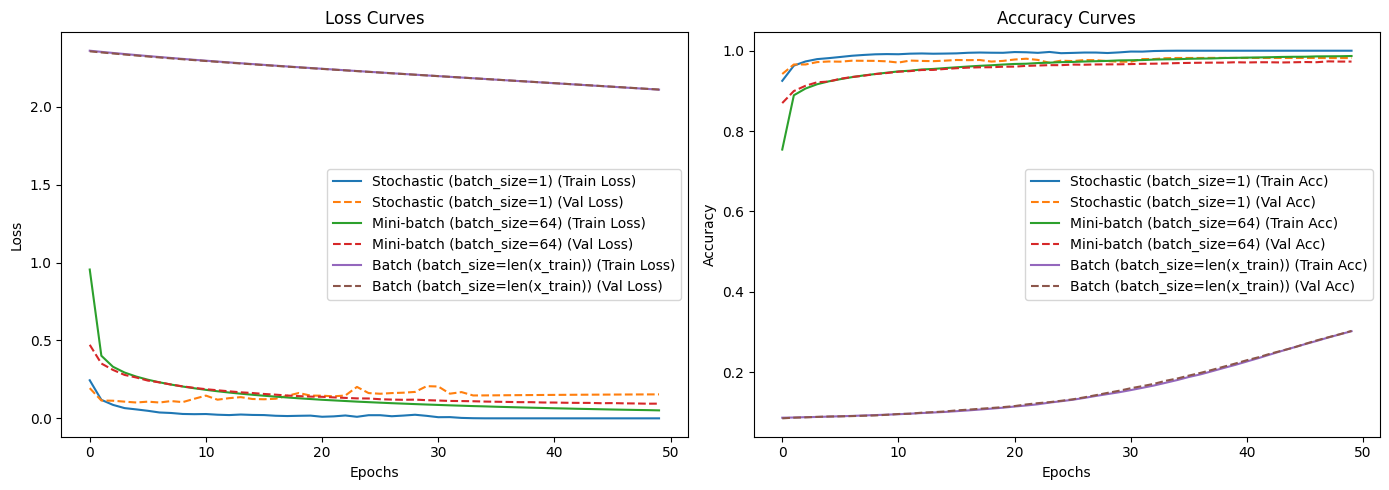

In [23]:
def train_model(model, batch_size, x_train, y_train, x_val, y_val, epochs=50):
    start_time = time.time()
    history = model.fit(
        x_train, y_train,
        validation_data=(x_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )
    end_time = time.time()
    training_time = end_time - start_time
    return history.history, training_time

batch_sizes = {
    'Stochastic (batch_size=1)': 1,
    'Mini-batch (batch_size=64)': 64,
    'Batch (batch_size=len(x_train))': len(x_train)
}

results = {}
for strategy, batch in batch_sizes.items():
    model = create_model()
    optimizer = SGD(learning_rate=0.01)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    history, t_time = train_model(model, batch, x_train, y_train, x_val, y_val, epochs=50)
    results[strategy] = {
        'history': history,
        'time': t_time
    }
    print(f"{strategy}: Training time = {t_time:.2f} seconds")

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
for strategy, data in results.items():
    plt.plot(data['history']['loss'], label=f"{strategy} (Train Loss)")
    plt.plot(data['history']['val_loss'], '--', label=f"{strategy} (Val Loss)")
plt.title("Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
for strategy, data in results.items():
    plt.plot(data['history']['accuracy'], label=f"{strategy} (Train Acc)")
    plt.plot(data['history']['val_accuracy'], '--', label=f"{strategy} (Val Acc)")
plt.title("Accuracy Curves")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


### 5. Compare Mini-Batch SGD Variants: Plain & Decay & Momentum

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5464 - loss: 1.5730 - val_accuracy: 0.8719 - val_loss: 0.4952
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8823 - loss: 0.4470 - val_accuracy: 0.9029 - val_loss: 0.3529
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9012 - loss: 0.3531 - val_accuracy: 0.9141 - val_loss: 0.3072
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9136 - loss: 0.3013 - val_accuracy: 0.9221 - val_loss: 0.2777
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9214 - loss: 0.2733 - val_accuracy: 0.9268 - val_loss: 0.2567
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9293 - loss: 0.2482 - val_accuracy: 0.9327 - val_loss: 0.2413
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9323 - loss: 0.2331 - val_accuracy: 0.9364 - val_loss: 0.2248
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9371 - loss: 0.2234 - val_accuracy: 0.

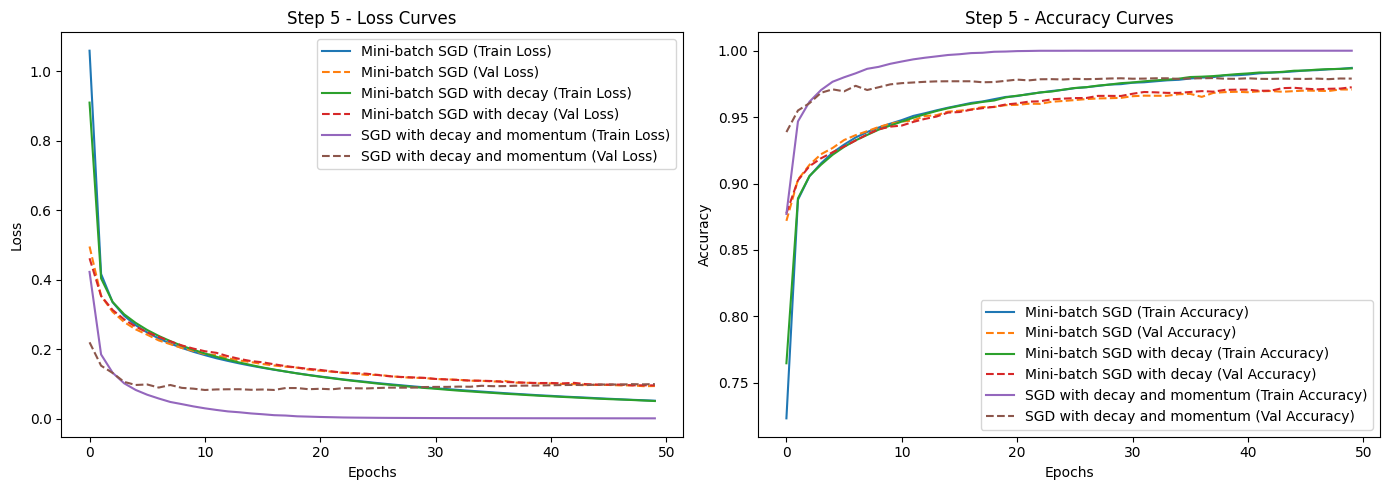

In [24]:
optimizers_step = {
    'Mini-batch SGD': SGD(learning_rate=0.01),
    'Mini-batch SGD with decay': SGD(learning_rate=0.01, decay=1e-6),
    'SGD with decay and momentum': SGD(learning_rate=0.01, decay=1e-6, momentum=0.9)
}

results_step = {}

for label, opt in optimizers_step.items():
    model = create_model()
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    history, t_time = train_model(model, batch_size=64,
                                  x_train=x_train, y_train=y_train,
                                  x_val=x_val, y_val=y_val, epochs=50)
    results_step[label] = {'history': history, 'time': t_time}
    print(f"{label}: Training time = {t_time:.2f} seconds")

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
for label, data in results_step.items():
    plt.plot(data['history']['loss'], label=f"{label} (Train Loss)")
    plt.plot(data['history']['val_loss'], '--', label=f"{label} (Val Loss)")
plt.title("Step 5 - Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
for label, data in results_step.items():
    plt.plot(data['history']['accuracy'], label=f"{label} (Train Accuracy)")
    plt.plot(data['history']['val_accuracy'], '--', label=f"{label} (Val Accuracy)")
plt.title("Step 5 - Accuracy Curves")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


### 6. Compare Different Optimizers: SGD, Adam, and RMSProp

In [25]:
optimizers_step = {
    'SGD (lr=0.01)': SGD(learning_rate=0.01),
    'Adam (lr=0.001)': Adam(learning_rate=0.001),
    'RMSprop (lr=0.001)': RMSprop(learning_rate=0.001)
}

results_step = {}
best_val_accuracy = 0.0
best_model_name = None
best_model_instance = None

for label, opt in optimizers_step.items():
    print(f"Training with {label}")
    model = create_model()
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    history, t_time = train_model(model, batch_size=64,
                                  x_train=x_train, y_train=y_train,
                                  x_val=x_val, y_val=y_val, epochs=50)
    final_val_acc = history['val_accuracy'][-1]
    results_step[label] = {'history': history, 'time': t_time, 'final_val_accuracy': final_val_acc}
    print(f"{label}: Final validation accuracy = {final_val_acc:.4f}, Training time = {t_time:.2f} seconds")

    if final_val_acc > best_val_accuracy:
        best_val_accuracy = final_val_acc
        best_model_name = label
        best_model_instance = model

print(f"\nBest model is {best_model_name} with validation accuracy {best_val_accuracy:.4f}")

best_model_instance.save('best_model.h5')
print("Best model saved as 'best_model.h5'.")




Training with SGD (lr=0.01)
Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5720 - loss: 1.4896 - val_accuracy: 0.8726 - val_loss: 0.4818
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8800 - loss: 0.4376 - val_accuracy: 0.9028 - val_loss: 0.3521
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9024 - loss: 0.3444 - val_accuracy: 0.9133 - val_loss: 0.3047
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9125 - loss: 0.3036 - val_accuracy: 0.9229 - val_loss: 0.2767
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9253 - loss: 0.2680 - val_accuracy: 0.9286 - val_loss: 0.2545
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9300 - loss: 0.2484 - val_accuracy: 0.9351 - val_loss: 0.2386
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9332 - loss: 0.2327 - val_accuracy: 0.9360 - val_loss: 0.2243
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9384 - los

RMSprop (lr=0.001): Final validation accuracy = 0.9801, Training time = 227.99 seconds

Best model is RMSprop (lr=0.001) with validation accuracy 0.9801
Best model saved as 'best_model.h5'.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Predictions for the first 10 test samples: [7 2 1 0 4 1 4 9 5 9]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
Predictions for the first 10 test samples: [7 2 1 0 4 1 4 9 5 9]


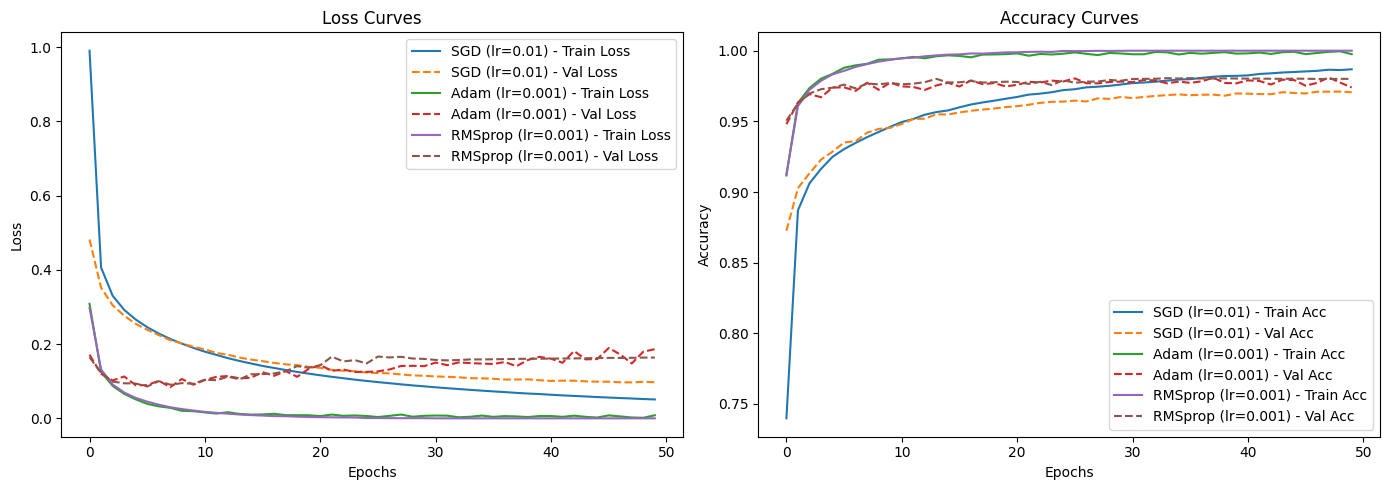

In [33]:

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
for label, data in results_step.items():
    history = data['history']
    plt.plot(history['loss'], label=f"{label} - Train Loss")
    plt.plot(history['val_loss'], '--', label=f"{label} - Val Loss")
plt.title("Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


plt.subplot(1, 2, 2)
for label, data in results_step.items():
    history = data['history']
    plt.plot(history['accuracy'], label=f"{label} - Train Acc")
    plt.plot(history['val_accuracy'], '--', label=f"{label} - Val Acc")
plt.title("Accuracy Curves")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


### 7. Export the Best Model and Make Predictions

In [34]:
loaded_model = load_model('best_model.h5')
predictions = loaded_model.predict(x_test[:10])
predicted_classes = np.argmax(predictions, axis=1)
print("Predictions for the first 10 test samples:", predicted_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
Predictions for the first 10 test samples: [7 2 1 0 4 1 4 9 5 9]


### P2 4. Training with Mini-batch SGD (batch_size=128, lr=0.01, 50 epochs)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.3935 - loss: 1.9846 - val_accuracy: 0.7989 - val_loss: 0.8763
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8284 - loss: 0.7333 - val_accuracy: 0.8643 - val_loss: 0.5090
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8751 - loss: 0.4793 - val_accuracy: 0.8900 - val_loss: 0.4079
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8934 - loss: 0.3921 - val_accuracy: 0.9014 - val_loss: 0.3591
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9038 - loss: 0.3483 - val_accuracy: 0.9087 - val_loss: 0.3273
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9059 - loss: 0.3307 - val_accuracy: 0.9142 - val_loss: 0.3077
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9133 - loss: 0.3025 - val_accuracy: 0.9188 - val_loss: 0.2923
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9182 - loss: 0.2851 - val_accuracy: 0.

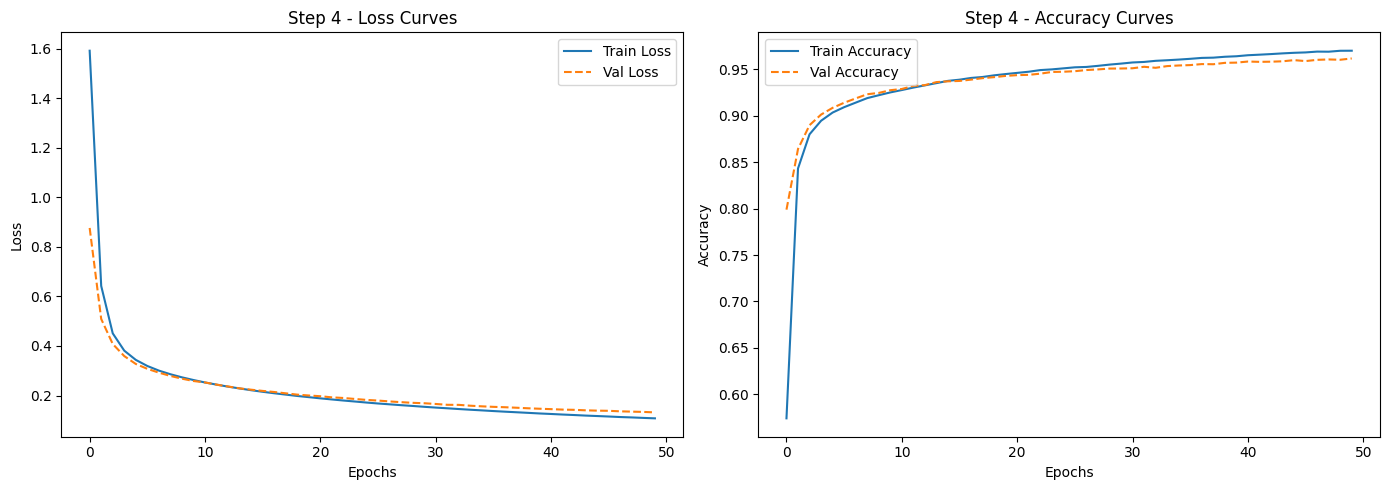

In [26]:
model_step = create_model()
optimizer_step = SGD(learning_rate=0.01)
model_step.compile(optimizer=optimizer_step, loss='categorical_crossentropy', metrics=['accuracy'])

history, time = train_model(model_step, batch_size=128,
                              x_train=x_train, y_train=y_train,
                              x_val=x_val, y_val=y_val, epochs=50)

print(f"Step 4: Training completed in {time:.2f} seconds.")

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history['loss'], label="Train Loss")
plt.plot(history['val_loss'], '--', label="Val Loss")
plt.title("Step 4 - Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history4['accuracy'], label="Train Accuracy")
plt.plot(history4['val_accuracy'], '--', label="Val Accuracy")
plt.title("Step 4 - Accuracy Curves")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


### P2 5. L2 Norm regularization on the second layer

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4545 - loss: 1.8189 - val_accuracy: 0.8258 - val_loss: 0.7422
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8472 - loss: 0.6420 - val_accuracy: 0.8781 - val_loss: 0.4696
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8820 - loss: 0.4471 - val_accuracy: 0.8952 - val_loss: 0.3864
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8941 - loss: 0.3798 - val_accuracy: 0.9038 - val_loss: 0.3465
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9058 - loss: 0.3375 - val_accuracy: 0.9106 - val_loss: 0.3202
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9078 - loss: 0.3225 - val_accuracy: 0.9147 - val_loss: 0.3014
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9155 - loss: 0.2961 - val_accuracy: 0.9179 - val_loss: 0.2865
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9188 - loss: 0.2847 - val_accuracy: 0.

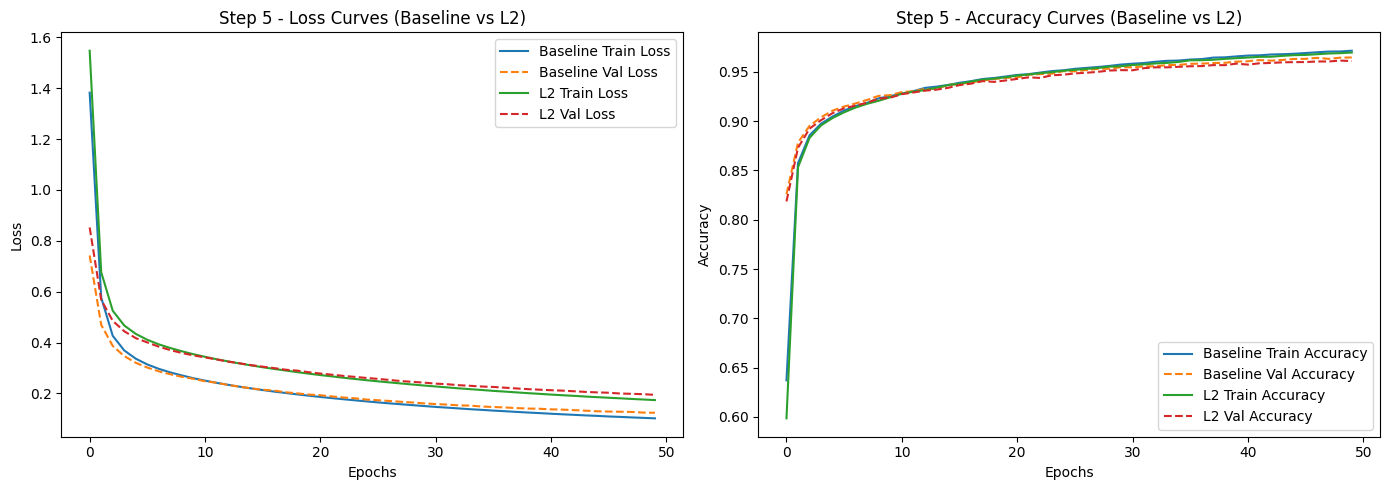

In [40]:
def create_model_l2():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(784,)))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dense(10, activation='softmax'))
    return model

model_baseline = create_model()
model_baseline.compile(optimizer=SGD(learning_rate=0.01),
                       loss='categorical_crossentropy', metrics=['accuracy'])
history_baseline, time_baseline = train_model(model_baseline, batch_size=128,
                                              x_train=x_train, y_train=y_train,
                                              x_val=x_val, y_val=y_val, epochs=50)

model_l2 = create_model_l2()
model_l2.compile(optimizer=SGD(learning_rate=0.01),
                 loss='categorical_crossentropy', metrics=['accuracy'])
history_l2, time_l2 = train_model(model_l2, batch_size=128,
                                  x_train=x_train, y_train=y_train,
                                  x_val=x_val, y_val=y_val, epochs=50)

print("Baseline training time = {:.2f} seconds".format(time_baseline))
print("L2 training time = {:.2f} seconds".format(time_l2))

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_baseline['loss'], label="Baseline Train Loss")
plt.plot(history_baseline['val_loss'], '--', label="Baseline Val Loss")
plt.plot(history_l2['loss'], label="L2 Train Loss")
plt.plot(history_l2['val_loss'], '--', label="L2 Val Loss")
plt.title("Step 5 - Loss Curves (Baseline vs L2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history_baseline['accuracy'], label="Baseline Train Accuracy")
plt.plot(history_baseline['val_accuracy'], '--', label="Baseline Val Accuracy")
plt.plot(history_l2['accuracy'], label="L2 Train Accuracy")
plt.plot(history_l2['val_accuracy'], '--', label="L2 Val Accuracy")
plt.title("Step 5 - Accuracy Curves (Baseline vs L2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


### P2 6. Dropout layer with rates of 0.2, 0.3, and 0.5

Training model with dropout rate = 0.2
Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3709 - loss: 1.9539 - val_accuracy: 0.8075 - val_loss: 0.8408
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7773 - loss: 0.8028 - val_accuracy: 0.8695 - val_loss: 0.5096
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8355 - loss: 0.5720 - val_accuracy: 0.8895 - val_loss: 0.4133
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8628 - loss: 0.4803 - val_accuracy: 0.9012 - val_loss: 0.3657
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8730 - loss: 0.4312 - val_accuracy: 0.9079 - val_loss: 0.3373
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8869 - loss: 0.3904 - val_accuracy: 0.9118 - val_loss: 0.3165
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8921 - loss: 0.3788 - val_accuracy: 0.9158 - val_loss: 0.3000
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0

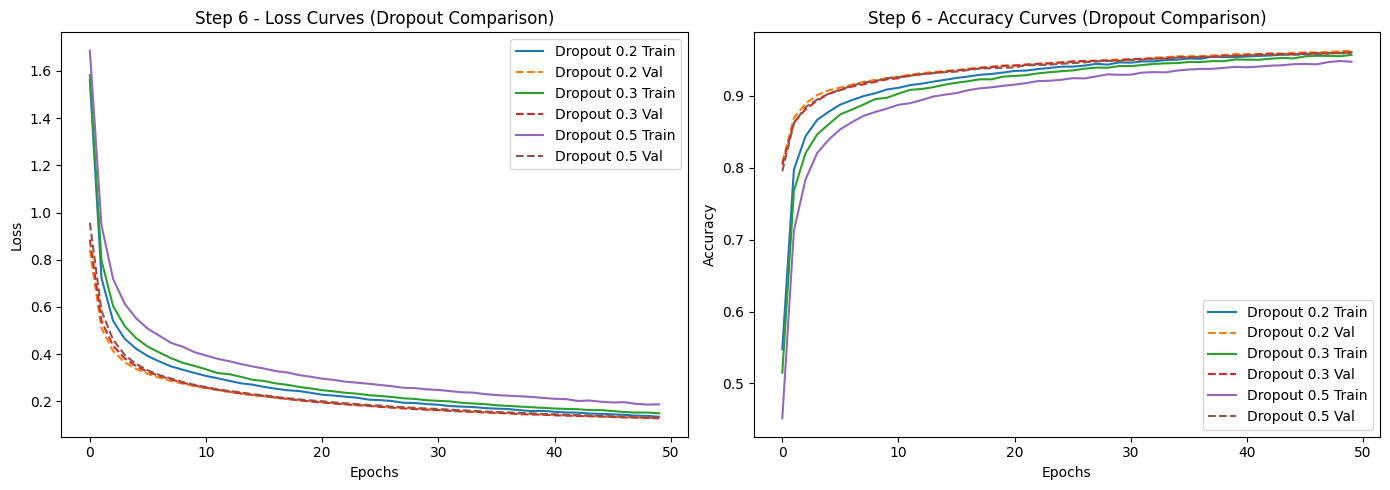

In [41]:
def create_model_dropout(dropout_rate):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(784,)))
    model.add(Dense(64, activation='relu'))
    # Apply dropout after the second fully connected layer
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))
    return model

dropout_rates = [0.2, 0.3, 0.5]
histories_dropout = {}
times_dropout = {}

for rate in dropout_rates:
    print(f"Training model with dropout rate = {rate}")
    model_dropout = create_model_dropout(rate)
    model_dropout.compile(optimizer=SGD(learning_rate=0.01),
                          loss='categorical_crossentropy', metrics=['accuracy'])
    history, t_time = train_model(model_dropout, batch_size=128,
                                  x_train=x_train, y_train=y_train,
                                  x_val=x_val, y_val=y_val, epochs=50)
    histories_dropout[rate] = history
    times_dropout[rate] = t_time
    print(f"Dropout {rate} training time = {t_time:.2f} seconds")

print("\nDropout training times:")
for rate, t in times_dropout.items():
    print(f"Dropout {rate}: {t:.2f} seconds")

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
for rate, history in histories_dropout.items():
    plt.plot(history['loss'], label=f"Dropout {rate} Train")
    plt.plot(history['val_loss'], '--', label=f"Dropout {rate} Val")
plt.title("Step 6 - Loss Curves (Dropout Comparison)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
for rate, history in histories_dropout.items():
    plt.plot(history['accuracy'], label=f"Dropout {rate} Train")
    plt.plot(history['val_accuracy'], '--', label=f"Dropout {rate} Val")
plt.title("Step 6 - Accuracy Curves (Dropout Comparison)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


### P2 7. Implement Early stopping technique

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.3765 - loss: 1.9702 - val_accuracy: 0.8110 - val_loss: 0.8477
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8323 - loss: 0.7102 - val_accuracy: 0.8707 - val_loss: 0.4922
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8730 - loss: 0.4696 - val_accuracy: 0.8919 - val_loss: 0.3970
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8948 - loss: 0.3812 - val_accuracy: 0.9019 - val_loss: 0.3521
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9011 - loss: 0.3516 - val_accuracy: 0.9076 - val_loss: 0.3241
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9081 - loss: 0.3205 - val_accuracy: 0.9131 - val_loss: 0.3057
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9144 - loss: 0.2993 - val_accuracy: 0.9180 - val_loss: 0.2897
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9183 - loss: 0.2831 - val_accuracy: 0

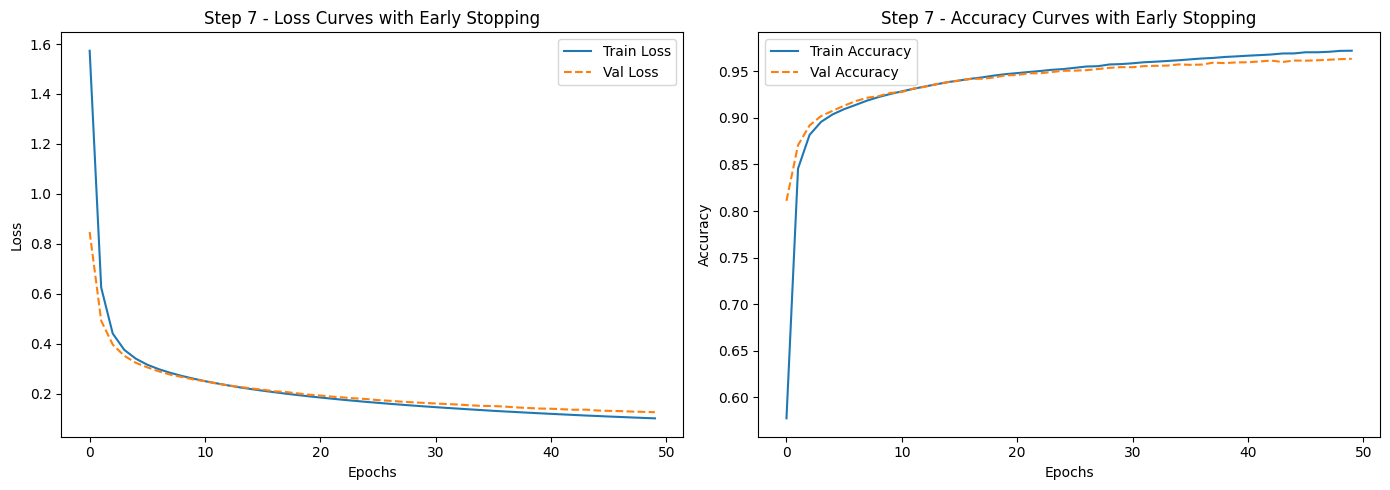

In [29]:
model_es = create_model()
model_es.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Configure EarlyStopping: monitor validation loss, with a patience of 5 epochs
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

history_es = model_es.fit(x_train, y_train,
                          validation_data=(x_val, y_val),
                          epochs=50,
                          batch_size=128,
                          callbacks=[early_stop],
                          verbose=1)

print(f"Step 7: Training stopped at epoch {early_stop.stopped_epoch + 1 if early_stop.stopped_epoch > 0 else 50}.")

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_es.history['loss'], label="Train Loss")
plt.plot(history_es.history['val_loss'], '--', label="Val Loss")
plt.title("Step 7 - Loss Curves with Early Stopping")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_es.history['accuracy'], label="Train Accuracy")
plt.plot(history_es.history['val_accuracy'], '--', label="Val Accuracy")
plt.title("Step 7 - Accuracy Curves with Early Stopping")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


### P2 8. Add a batch normalization layer after the first hidden layer

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6406 - loss: 1.1826 - val_accuracy: 0.8911 - val_loss: 0.4364
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9014 - loss: 0.3661 - val_accuracy: 0.9215 - val_loss: 0.2863
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9232 - loss: 0.2783 - val_accuracy: 0.9331 - val_loss: 0.2393
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9365 - loss: 0.2300 - val_accuracy: 0.9395 - val_loss: 0.2132
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9431 - loss: 0.2057 - val_accuracy: 0.9450 - val_loss: 0.1943
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9491 - loss: 0.1854 - val_accuracy: 0.9493 - val_loss: 0.1806
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9527 - loss: 0.1697 - val_accuracy: 0.9521 - val_loss: 0.1705
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9573 - loss: 0.1538 - val_accuracy: 0.

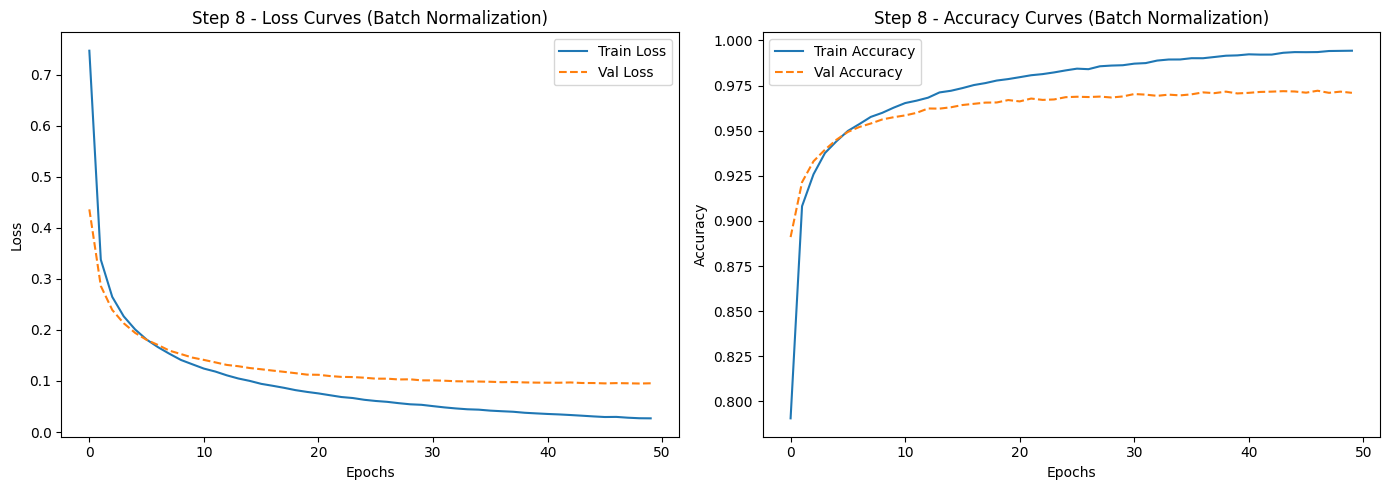

In [30]:
def create_model_bn():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(784,)))
    model.add(BatchNormalization())  # Batch Normalization layer added here
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

model_bn = create_model_bn()
model_bn.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

history_bn, time_bn = train_model(model_bn, batch_size=128,
                                  x_train=x_train, y_train=y_train,
                                  x_val=x_val, y_val=y_val, epochs=50)

print(f"Step 8: Training with Batch Normalization completed in {time_bn:.2f} seconds.")

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_bn['loss'], label="Train Loss")
plt.plot(history_bn['val_loss'], '--', label="Val Loss")
plt.title("Step 8 - Loss Curves (Batch Normalization)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_bn['accuracy'], label="Train Accuracy")
plt.plot(history_bn['val_accuracy'], '--', label="Val Accuracy")
plt.title("Step 8 - Accuracy Curves (Batch Normalization)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


### P2 9. Implement Random search to find the best hyperparameters for learning_rate, dropout_rate, and batch_size

In [31]:
learning_rates = [0.001, 0.005, 0.01, 0.05]
dropout_rates = [0.2, 0.3, 0.5]
batch_sizes = [64, 128, 256]

num_iterations = 10

best_val_acc = 0.0
best_params = {}
best_history = None

def create_model_dropout_custom(dropout_rate):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(784,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))
    return model

for i in range(num_iterations):
    lr = random.choice(learning_rates)
    dr = random.choice(dropout_rates)
    bs = random.choice(batch_sizes)

    print(f"Iteration {i+1}: lr={lr}, dropout_rate={dr}, batch_size={bs}")

    model_rs = create_model_dropout_custom(dr)
    optimizer_rs = SGD(learning_rate=lr)
    model_rs.compile(optimizer=optimizer_rs, loss='categorical_crossentropy', metrics=['accuracy'])

    history_rs, _ = train_model(model_rs, batch_size=bs,
                                x_train=x_train, y_train=y_train,
                                x_val=x_val, y_val=y_val, epochs=20)
    current_val_acc = history_rs['val_accuracy'][-1]
    print(f"Validation Accuracy: {current_val_acc:.4f}")

    if current_val_acc > best_val_acc:
        best_val_acc = current_val_acc
        best_params = {'learning_rate': lr, 'dropout_rate': dr, 'batch_size': bs}
        best_history = history_rs

print("\nBest Hyperparameters Found:")
print(best_params)
print(f"Best Validation Accuracy: {best_val_acc:.4f}")


Iteration 1: lr=0.001, dropout_rate=0.2, batch_size=128
Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1208 - loss: 2.3552 - val_accuracy: 0.2718 - val_loss: 2.1561
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2833 - loss: 2.1198 - val_accuracy: 0.4921 - val_loss: 1.9579
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4589 - loss: 1.9263 - val_accuracy: 0.6053 - val_loss: 1.7462
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5669 - loss: 1.7201 - val_accuracy: 0.6752 - val_loss: 1.5289
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6333 - loss: 1.5116 - val_accuracy: 0.7328 - val_loss: 1.3250
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6762 - loss: 1.3298 - val_accuracy: 0.7674 - val_loss: 1.1505
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7122 - loss: 1.1699 - val_accuracy: 0.7945 - val_loss: 1.0103
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/s